### Question 4

#### Import relevant packages

In [ ]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

#### (a) Load the dataset `binary_alpha_digits` from `tensorflow_datasets`. Split the dataset into 60% for training and 40% for testing [**2 points**]

In [ ]:
import tensorflow_datasets as tfds

## write your code here
df, df_info = tfds.load('binary_alpha_digits', with_info = True, as_supervised = True)
print(df_info)

tfds.core.DatasetInfo(
    name='binary_alpha_digits',
    full_name='binary_alpha_digits/1.0.0',
    description="""
    Binary 20x16 digits of '0' through '9' and capital 'A' through 'Z'. 39 examples of each class.
    """,
    homepage='https://cs.nyu.edu/~roweis/data/',
    data_path='~/tensorflow_datasets/binary_alpha_digits/1.0.0',
    file_format=tfrecord,
    download_size=519.83 KiB,
    dataset_size=233.58 KiB,
    features=FeaturesDict({
        'image': Image(shape=(20, 16, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=36),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=1404, num_shards=1>,
    },
    citation="""
    """,
)


In [ ]:
## write your code here to split data into 60% train 40% test
train, test = tfds.load('binary_alpha_digits', split = ['train[:60%]', 'train[60%:]'])


In [ ]:
def preprocess(data):
    image = data['image']
    label = data['label']
    return image, label

train = train.map(preprocess)
train = train.shuffle(1024)
train = train.batch(batch_size = 32)

test = test.map(preprocess)
test = test.batch(batch_size = 32)

#### (b) Build a dense ANN with at least one hidden layer with at least two nodes. You should try different hyper parameter configurations to get the best performing ANN. [**2 points**]

In [ ]:
model = tf.keras.Sequential()

## write your code here to build your dense ANN
model.add(layers.Flatten(input_shape = (20, 16, 1)))
model.add(layers.Dense(64, activation=tf.nn.relu))
model.add(layers.Dense(64, activation=tf.nn.relu))


In [ ]:
model.add(layers.Dense(36, activation=tf.nn.softmax)) 

#### (c) Answer the following questions: [**1 point**]

What is the size of your output layer? [10]

What is the activation function of your output layer? [softmax activation function]

#### (d) Compile and train your model [**2 points**]

What is the loss function you use? [categorical_crossentropy]

In [ ]:
### write your code here to compile model

model.compile(optimizer = 'adam',
           loss = 'sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [ ]:
### write your code here to train your model

history = model.fit(train, epochs=10, validation_data=test)

Epoch 1/10
27/27 [==============================] - 1s 10ms/step - loss: 3.4692 - accuracy: 0.0772 - val_loss: 3.3500 - val_accuracy: 0.1068
Epoch 2/10
27/27 [==============================] - 0s 3ms/step - loss: 3.0109 - accuracy: 0.2411 - val_loss: 2.8735 - val_accuracy: 0.2224
Epoch 3/10
27/27 [==============================] - 0s 3ms/step - loss: 2.3861 - accuracy: 0.3682 - val_loss: 2.2431 - val_accuracy: 0.3843
Epoch 4/10
27/27 [==============================] - 0s 3ms/step - loss: 1.7685 - accuracy: 0.5475 - val_loss: 1.7580 - val_accuracy: 0.5160
Epoch 5/10
27/27 [==============================] - 0s 3ms/step - loss: 1.3607 - accuracy: 0.6520 - val_loss: 1.4907 - val_accuracy: 0.5534
Epoch 6/10
27/27 [==============================] - 0s 3ms/step - loss: 1.0947 - accuracy: 0.7043 - val_loss: 1.3344 - val_accuracy: 0.5765
Epoch 7/10
27/27 [==============================] - 0s 3ms/step - loss: 0.9334 - accuracy: 0.7328 - val_loss: 1.2317 - val_accuracy: 0.6050
Epoch 8/10
27/27 [=

#### (e) Plot the training loss across the different epochs [**1 point**]

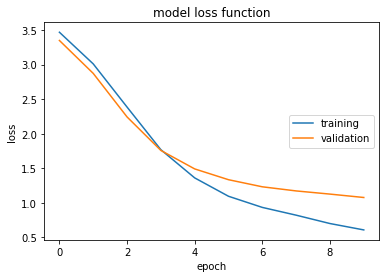

In [ ]:
### write your code to plot training loss (hint: use history)
# Plot loss function
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss function')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='center right')
plt.show()

#### (f) What is the overall accuracy and per-class accuracy on test dataset? [**2 points**]

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

Y_test = np.concatenate([y for x, y in test], axis=0)
y_pred = np.argmax(model.predict(test), axis=-1)
print(classification_report(Y_test, y_pred))#### write your code to report overall accuracy on test set



              precision    recall  f1-score   support

           0       0.25      0.18      0.21        17
           1       0.78      0.82      0.80        17
           2       0.31      0.38      0.34        13
           3       0.61      0.79      0.69        14
           4       0.63      0.71      0.67        17
           5       0.60      0.64      0.62        14
           6       0.71      0.67      0.69        18
           7       0.80      0.73      0.76        11
           8       0.70      0.58      0.64        12
           9       1.00      0.87      0.93        15
          10       0.71      1.00      0.83        12
          11       0.70      0.64      0.67        11
          12       0.82      0.88      0.85        16
          13       0.91      0.67      0.77        15
          14       0.78      0.82      0.80        17
          15       0.82      0.78      0.80        23
          16       0.40      0.25      0.31        16
          17       0.52    

What is the overall accuracy? [65%]